In [1]:
import pandas as pd
import numpy as np
import re
import dateparser
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

In [2]:
tweet=pd.read_csv("covid19_tweets.csv")
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97705,Paul Kneeshaw,Canberra,Editor ABC TV Canberra; love sports esp cricke...,2015-11-18 05:56:04,405,1351,10892,False,2020-08-09 03:05:50,@blahblahellis @plalor and I'm pretty sure the...,NaN,Twitter Web App,False
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,@DBTayor It's obvious he died of #Covid19,['Covid19'],Twitter Web App,False
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,The world in which we now live. #TrumpThreaten...,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False
97708,Prawin #StayHome #Staysafe,"Hyderabad, India",keep smiling ♌️♐️,2017-09-26 11:38:53,11,67,535,False,2020-08-09 03:05:40,Fire broke out at Swarnalatha Palace at #Chall...,"['Challapalli', 'Eluru', 'AndhraPradesh']",Twitter for Android,False


In [3]:
tweet.count()


user_name           97710
user_location       77881
user_description    92184
user_created        97710
user_followers      97710
user_friends        97710
user_favourites     97710
user_verified       97710
date                97710
text                97710
hashtags            69689
source              97684
is_retweet          97710
dtype: int64

In [4]:
tweet = tweet.dropna()
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,"After 6 months without lockdown, Sweden's COVI...","['COVID19', 'Sweden']",Twitter Web App,False
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,"#Odisha: #COVID19 recoveries crossed 30,000 ma...","['Odisha', 'COVID19']",Twitter Web App,False
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,@DBTayor It's obvious he died of #Covid19,['Covid19'],Twitter Web App,False
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,The world in which we now live. #TrumpThreaten...,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False


In [5]:
tweet = tweet.drop_duplicates()
tweet.count()


user_name           54276
user_location       54276
user_description    54276
user_created        54276
user_followers      54276
user_friends        54276
user_favourites     54276
user_verified       54276
date                54276
text                54276
hashtags            54276
source              54276
is_retweet          54276
dtype: int64

In [6]:
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,"After 6 months without lockdown, Sweden's COVI...","['COVID19', 'Sweden']",Twitter Web App,False
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,"#Odisha: #COVID19 recoveries crossed 30,000 ma...","['Odisha', 'COVID19']",Twitter Web App,False
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,@DBTayor It's obvious he died of #Covid19,['Covid19'],Twitter Web App,False
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,The world in which we now live. #TrumpThreaten...,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False


In [7]:
import preprocessor as p
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

tweet['text'] = tweet.apply(preprocess_tweet, axis=1)

In [8]:
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed was a hoax. We all cl...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The one gift has give me is an appreciation fo...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,July : Media Bulletin on Novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue to rise. It's almost as bad as...,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How Will Change Work in General (and recruitin...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,"After months without lockdown, Sweden's COVID-...","['COVID19', 'Sweden']",Twitter Web App,False
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,: recoveries crossed mark after patients disch...,"['Odisha', 'COVID19']",Twitter Web App,False
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,It's obvious he died of,['Covid19'],Twitter Web App,False
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,The world in which we now live.,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False


In [9]:
from gensim.parsing.preprocessing import remove_stopwords

In [10]:
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

tweet['text'] = tweet.apply(stopword_removal, axis=1)

In [11]:
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump claimed hoax. We claim effort,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The gift appreciation simple things,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,July : Media Bulletin Novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise. It's bad was. Politician...,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,"How Will Change Work General (and recruiting, ...","['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,"After months lockdown, Sweden's COVID-19 death...","['COVID19', 'Sweden']",Twitter Web App,False
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,: recoveries crossed mark patients discharged ...,"['Odisha', 'COVID19']",Twitter Web App,False
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,It's obvious died,['Covid19'],Twitter Web App,False
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,The world live.,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False


In [12]:
tweet['text'] = tweet['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [13]:
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,after months lockdown sweden s covid 19 deaths...,"['COVID19', 'Sweden']",Twitter Web App,False
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,recoveries crossed mark patients discharged h...,"['Odisha', 'COVID19']",Twitter Web App,False
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,it s obvious died,['Covid19'],Twitter Web App,False
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,the world live,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False


In [14]:
tweet.head(50)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,pope as god prophet sadhu sundar selvaraj watch,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False
11,Creativegms,"Dhaka,Bangladesh","I'm Motalib Mia, Logo -Logo Designer - Brandin...",2020-01-12 09:03:01,241,1694,8443,False,2020-07-25 12:26:50,order here,"['logo', 'graphicdesigner', 'logodesign', 'log...",Twitter Web App,False
12,SEXXYLYPPS,Hotel living - various cities! Who needs a ho...,"My ink ""My Way...No Regrets""\nAlways Make Happ...",2010-03-25 21:16:20,0,8,32,False,2020-07-25 12:26:47,safe safe will commit ensure,['COVID19'],Twitter Web App,False
13,Africa Youth Advisory Board on DRR,Africa,Official account of the Africa Youth Advisory ...,2019-05-13 06:27:47,830,254,3692,False,2020-07-25 12:26:47,let s protect it s real numbers climbing fast ...,['COVID19'],Twitter Web App,False
15,Dimapur 24/7.,"Nagaland, India",strive to promote Truth with Integrity.\nhttps...,2019-11-11 12:02:27,274,32,378,False,2020-07-25 12:26:45,nagaland police covid 19 awareness city tower ...,"['Covid19', 'keepsocialdistance']",Twitter for Android,False


In [15]:
tweet['date_']=pd.to_datetime(tweet['date'].apply(lambda x : x.split(' ')[0]) )
tweet


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False,2020-07-25
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False,2020-07-25
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020-07-25
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False,2020-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,after months lockdown sweden s covid 19 deaths...,"['COVID19', 'Sweden']",Twitter Web App,False,2020-08-09
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,recoveries crossed mark patients discharged h...,"['Odisha', 'COVID19']",Twitter Web App,False,2020-08-09
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,it s obvious died,['Covid19'],Twitter Web App,False,2020-08-09
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,the world live,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False,2020-08-09


In [16]:
tweet['time']=tweet['date'].apply(lambda x : x.split(' ')[1]) 
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_,time
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False,2020-07-25,12:27:14
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False,2020-07-25,12:27:10
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020-07-25,12:27:08
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25,12:27:06
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False,2020-07-25,12:27:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,after months lockdown sweden s covid 19 deaths...,"['COVID19', 'Sweden']",Twitter Web App,False,2020-08-09,03:06:00
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,recoveries crossed mark patients discharged h...,"['Odisha', 'COVID19']",Twitter Web App,False,2020-08-09,03:05:59
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,it s obvious died,['Covid19'],Twitter Web App,False,2020-08-09,03:05:42
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,the world live,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False,2020-08-09,03:05:41


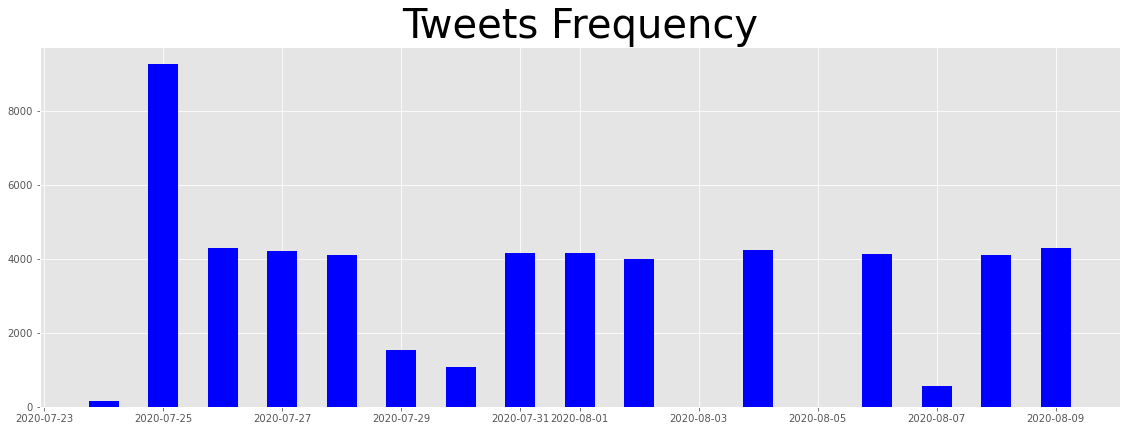

         Date  Count
0  2020-07-24    153
1  2020-07-25   9272
2  2020-07-26   4284
3  2020-07-27   4207
4  2020-07-28   4114
5  2020-07-29   1527
6  2020-07-30   1064
7  2020-07-31   4167
8  2020-08-01   4158
9  2020-08-02   3990
10 2020-08-04   4245
11 2020-08-06   4136
12 2020-08-07    575
13 2020-08-08   4099
14 2020-08-09   4285


In [17]:
def plot_line(x, y, title, max_limit=0):

    f = plt.figure(figsize=(15, 5))
    if max_limit > 0:
        x = x[0:max_limit]
        y = y[0:max_limit]
    ax = f.add_axes([0,0,1,1])
    ax.bar(x,y,color = 'b',width=0.5)
    plt.title(title, fontdict={"fontsize": 40})
    # barlist[np.argmax(y)].set_color(ORANGE_COLOR)
    # for bar in barlist:
    #     yval = bar.get_height()
    #     plt.text(
    #         bar.get_x() + bar.get_width() / 2.0,
    #         1.01 * yval,
    #         int(yval),
    #         ha="center",
    #         va="bottom",
    #     
    plt.show()
    
def datewisetweet(df, plot=False):
    grouped = df.groupby("date_", as_index=False)["time"]
    df_ = grouped.count()
    df_.columns = ["Date", "Count"]
    if plot:
        plot_line(x=df_["Date"], y=df_["Count"], title="Tweets Frequency")

    return df_

datetweets=datewisetweet(tweet,plot=True)
print(datetweets)



In [18]:
tweet['weekday'] = tweet['date_'].apply(lambda x: x.day_name())

In [19]:
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_,time,weekday
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False,2020-07-25,12:27:14,Saturday
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False,2020-07-25,12:27:10,Saturday
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020-07-25,12:27:08,Saturday
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25,12:27:06,Saturday
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False,2020-07-25,12:27:03,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,after months lockdown sweden s covid 19 deaths...,"['COVID19', 'Sweden']",Twitter Web App,False,2020-08-09,03:06:00,Sunday
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,recoveries crossed mark patients discharged h...,"['Odisha', 'COVID19']",Twitter Web App,False,2020-08-09,03:05:59,Sunday
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,it s obvious died,['Covid19'],Twitter Web App,False,2020-08-09,03:05:42,Sunday
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,the world live,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False,2020-08-09,03:05:41,Sunday


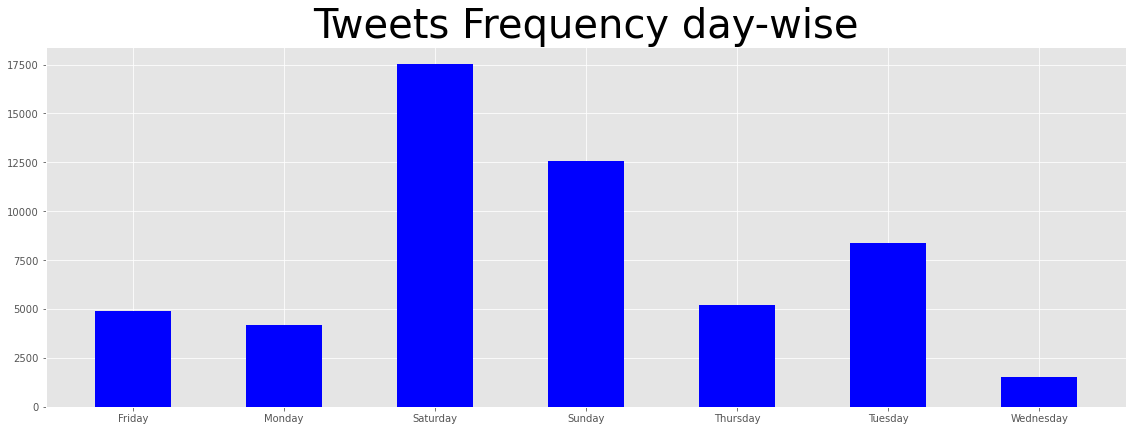

     Weekday  Count
0     Friday   4895
1     Monday   4207
2   Saturday  17529
3     Sunday  12559
4   Thursday   5200
5    Tuesday   8359
6  Wednesday   1527


In [20]:
def daywisetweet(df, plot=False):
    grouped = df.groupby("weekday", as_index=False)["text"]
    df_ = grouped.count()
    df_.columns = ["Weekday", "Count"]
    if plot:
        plot_line(x=df_["Weekday"], y=df_["Count"], title="Tweets Frequency day-wise")

    return df_

daytweets=daywisetweet(tweet,plot=True)
print(daytweets)

Considering Saturday and Saturday are repeated(3times) more than other weekdays(2 times) 



Wednesday has surprisingly less tweets


In [21]:
tweet['Word'] = tweet['text'].apply(lambda s : s.split(' '))
tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_,time,weekday,Word
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False,2020-07-25,12:27:14,Saturday,"[trump, claimed, hoax, we, claim, effort]"
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False,2020-07-25,12:27:10,Saturday,"[the, gift, appreciation, simple, things]"
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020-07-25,12:27:08,Saturday,"[july, media, bulletin, novel]"
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25,12:27:06,Saturday,"[deaths, continue, rise, it, s, bad, was, poli..."
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False,2020-07-25,12:27:03,Saturday,"[how, will, change, work, general, and, recrui..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97703,Awoken Mage,"Seattle, WA","Recovering lefty liberal, red pilled to the re...",2017-10-10 04:20:10,86,516,4127,False,2020-08-09 03:06:00,after months lockdown sweden s covid 19 deaths...,"['COVID19', 'Sweden']",Twitter Web App,False,2020-08-09,03:06:00,Sunday,"[after, months, lockdown, sweden, s, covid, 19..."
97704,All India Radio News,"New Delhi, India","Official account of News Services Division, Al...",2013-01-03 04:15:45,2492823,17,632,True,2020-08-09 03:05:59,recoveries crossed mark patients discharged h...,"['Odisha', 'COVID19']",Twitter Web App,False,2020-08-09,03:05:59,Sunday,"[, recoveries, crossed, mark, patients, discha..."
97706,Mary Loedding Sells 🇺🇸🇮🇱,Alaska,Born & raised in Pittsburgh Alaska is home now...,2009-05-03 08:05:15,1820,2626,19572,False,2020-08-09 03:05:42,it s obvious died,['Covid19'],Twitter Web App,False,2020-08-09,03:05:42,Sunday,"[it, s, obvious, died]"
97707,💯🌊PJT #TurnTexasBlue,United States,🌊🌊Ride🌊🌊The🌊🌊Blue🌊🌊Wave 💙 💙💙#Resistance #Blue2...,2020-04-06 16:12:59,2854,3846,1514,False,2020-08-09 03:05:41,the world live,"['TrumpThreatensAmerica', 'COVID19', 'TrumpKil...",Twitter Web App,False,2020-08-09,03:05:41,Sunday,"[the, world, live, ]"


In [22]:
import nltk
raw1 = []
for word in tweet.text:
    token = nltk.word_tokenize(str(word).lower())
    raw1.extend(token)


stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
raw2 = remove_stopwords(raw1)



In [23]:
fdist2 = nltk.FreqDist(raw2)
fdist2

FreqDist({'cases': 6663, 'new': 4330, 'amp': 3747, 'covid': 2927, 'people': 2376, 'deaths': 2342, 'positive': 2192, '19': 2164, 'pandemic': 2025, 'today': 1660, ...})

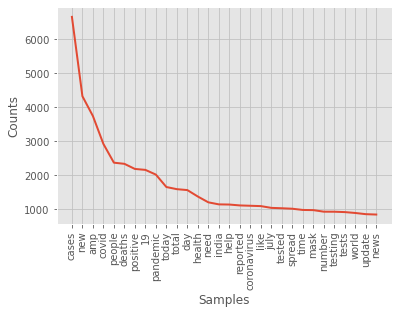

TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

In [24]:
fdist2.plot(30).draw()

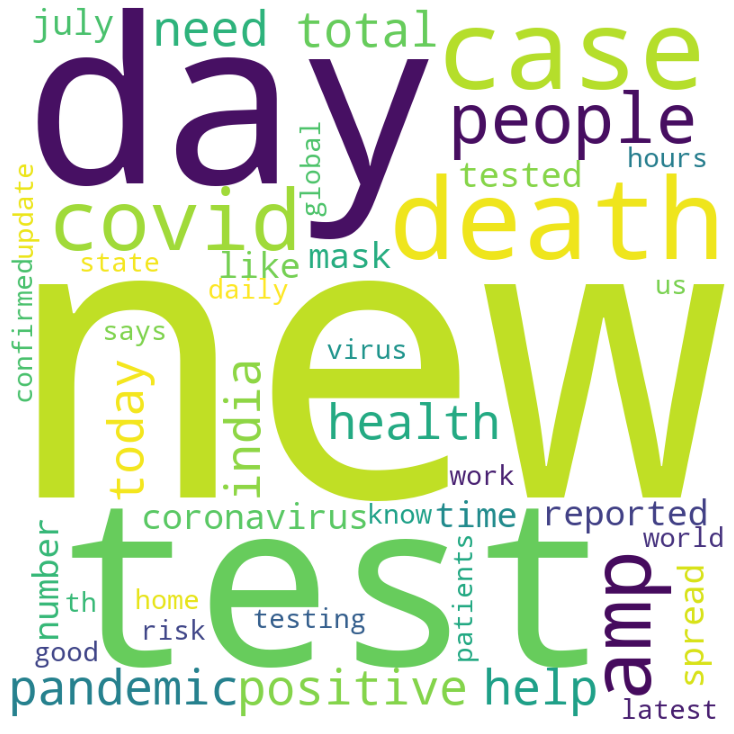

In [25]:
from wordcloud import WordCloud
words_for_wordcloud = ' '.join([w[0] for w in fdist2.most_common(50)])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords='',min_font_size = 10).generate(words_for_wordcloud) 
# plot the WordCloud image                        
plt.figure(figsize = (10, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [26]:
from textblob import TextBlob

In [27]:
sentiment_objects = [TextBlob(tweet) for tweet in tweet['text']]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("trump claimed hoax we claim effort"))

In [52]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values[50]
sentiment_valarray=np.array(sentiment_values)
sentiment_valarray

array([['0.0', 'trump claimed hoax we claim effort'],
       ['0.0', 'the gift appreciation simple things'],
       ['0.0', 'july media bulletin novel'],
       ...,
       ['0.0', 'it s obvious died'],
       ['0.13636363636363635', 'the world live '],
       ['0.0',
        'fire broke swarnalatha palace a corporate hospital taken']],
      dtype='<U114')

In [29]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.000000,trump claimed hoax we claim effort
1,0.000000,the gift appreciation simple things
2,0.000000,july media bulletin novel
3,-0.700000,deaths continue rise it s bad was politicians ...
4,0.050000,how will change work general and recruiting sp...
...,...,...
54271,0.000000,after months lockdown sweden s covid 19 deaths...
54272,0.000000,recoveries crossed mark patients discharged h...
54273,0.000000,it s obvious died
54274,0.136364,the world live


In [82]:
tweet['Sentiment']=sentiment_valarray
tweet.head(100)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_,time,weekday,Word,Sentiment
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False,2020-07-25,12:27:14,Saturday,"[trump, claimed, hoax, we, claim, effort]",0.0
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False,2020-07-25,12:27:10,Saturday,"[the, gift, appreciation, simple, things]",0.0
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020-07-25,12:27:08,Saturday,"[july, media, bulletin, novel]",0.0
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25,12:27:06,Saturday,"[deaths, continue, rise, it, s, bad, was, poli...",-0.6999999999999998
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False,2020-07-25,12:27:03,Saturday,"[how, will, change, work, general, and, recrui...",0.05000000000000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,First India,"Jaipur, India",Welcome to the Official Twitter page of First ...,2019-04-04 10:16:38,5706,202,118,False,2020-07-25 12:21:12,rajasthan government today started sawai man ...,"['Jaipur', 'PlasmaBank']",Twitter Web App,False,2020-07-25,12:21:12,Saturday,"[, rajasthan, government, today, started, sawa...",0.0
194,Rutland Radio,Rutland,Greatest Hits for Stamford and Rutland on your...,2010-10-12 15:16:25,7704,1268,11477,False,2020-07-25 12:21:03,rutland s own supporting testing,['COVID19'],Twitter Web App,False,2020-07-25,12:21:03,Saturday,"[rutland, s, own, supporting, testing]",0.425
197,SOLA-Support 🇮🇪,Dublin/Limerick,"We provide information sessions, seminars and ...",2020-05-25 13:48:59,201,549,80,False,2020-07-25 12:21:00,you want understand improving quality it repre...,['COVID19'],Twitter Web App,False,2020-07-25,12:21:00,Saturday,"[you, want, understand, improving, quality, it...",0.0
198,Reclaim Humanity,Central Illinois via Western WA,A Democratic woman. True laughter comes from t...,2011-12-02 19:01:33,4579,5034,72501,False,2020-07-25 12:20:59,so spread lies hate sexual violence murder,"['COVID19', 'FoxNews']",Twitter for Android,False,2020-07-25,12:20:59,Saturday,"[so, spread, lies, hate, sexual, violence, mur...",-0.15000000000000002


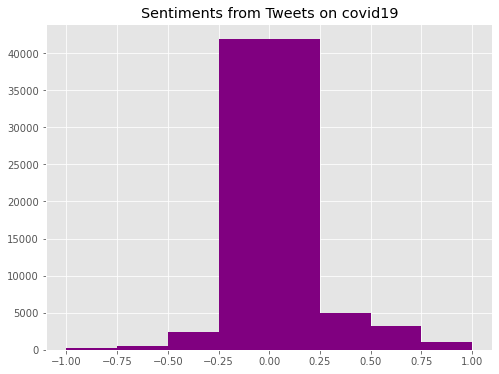

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on covid19")
plt.show()

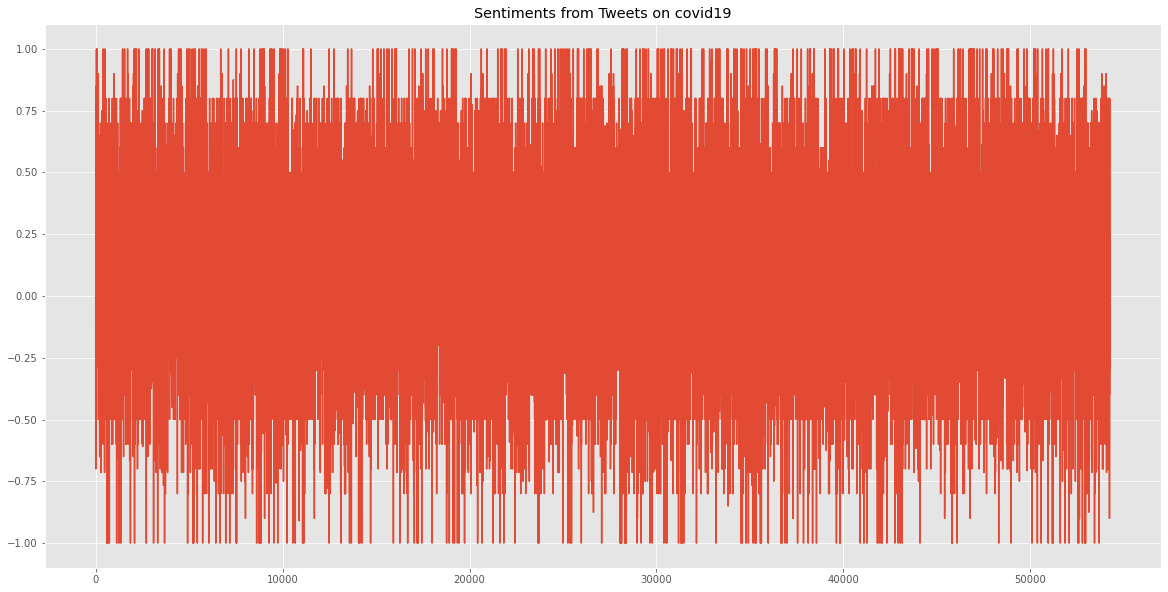

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))


plt.plot(sentiment_df['polarity'])


plt.title("Sentiments from Tweets on covid19")
plt.show()

In [136]:
tweet['Sentiment']=tweet.Sentiment.astype('float64')
tweet['distress'] = np.where(tweet.Sentiment.astype('float64') >= 0.05, 0, 1)
tweet.head(60)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_,time,weekday,Word,Sentiment,distress
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,trump claimed hoax we claim effort,['COVID19'],Twitter for Android,False,2020-07-25,12:27:14,Saturday,"[trump, claimed, hoax, we, claim, effort]",0.000000,1
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,the gift appreciation simple things,['COVID19'],Twitter for iPhone,False,2020-07-25,12:27:10,Saturday,"[the, gift, appreciation, simple, things]",0.000000,1
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,july media bulletin novel,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,2020-07-25,12:27:08,Saturday,"[july, media, bulletin, novel]",0.000000,1
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue rise it s bad was politicians ...,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25,12:27:06,Saturday,"[deaths, continue, rise, it, s, bad, was, poli...",-0.700000,1
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,how will change work general and recruiting sp...,"['COVID19', 'Recruiting']",Buffer,False,2020-07-25,12:27:03,Saturday,"[how, will, change, work, general, and, recrui...",0.050000,0
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,pope as god prophet sadhu sundar selvaraj watch,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False,2020-07-25,12:26:54,Saturday,"[pope, as, god, prophet, sadhu, sundar, selvar...",0.000000,1
11,Creativegms,"Dhaka,Bangladesh","I'm Motalib Mia, Logo -Logo Designer - Brandin...",2020-01-12 09:03:01,241,1694,8443,False,2020-07-25 12:26:50,order here,"['logo', 'graphicdesigner', 'logodesign', 'log...",Twitter Web App,False,2020-07-25,12:26:50,Saturday,"[order, here, ]",0.000000,1
12,SEXXYLYPPS,Hotel living - various cities! Who needs a ho...,"My ink ""My Way...No Regrets""\nAlways Make Happ...",2010-03-25 21:16:20,0,8,32,False,2020-07-25 12:26:47,safe safe will commit ensure,['COVID19'],Twitter Web App,False,2020-07-25,12:26:47,Saturday,"[safe, safe, will, commit, ensure]",0.500000,0
13,Africa Youth Advisory Board on DRR,Africa,Official account of the Africa Youth Advisory ...,2019-05-13 06:27:47,830,254,3692,False,2020-07-25 12:26:47,let s protect it s real numbers climbing fast ...,['COVID19'],Twitter Web App,False,2020-07-25,12:26:47,Saturday,"[let, s, protect, it, s, real, numbers, climbi...",0.200000,0
15,Dimapur 24/7.,"Nagaland, India",strive to promote Truth with Integrity.\nhttps...,2019-11-11 12:02:27,274,32,378,False,2020-07-25 12:26:45,nagaland police covid 19 awareness city tower ...,"['Covid19', 'keepsocialdistance']",Twitter for Android,False,2020-07-25,12:26:45,Saturday,"[nagaland, police, covid, 19, awareness, city,...",0.000000,1


Verified Twitter Account Analysis

In [137]:
new_tweet=tweet.loc[tweet['user_verified']== True]
new_tweet

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,date_,time,weekday,Word,Sentiment,distress
25,Blood Donors India,"Mumbai, India",Focused on matching blood donors with those in...,2008-12-23 07:55:39,1215920,2047,19359,True,2020-07-25 12:26:26,type b positiveat jalappa hospitalblood compon...,"['Kolar', 'Blood', 'COVID19']",Blood Donors India,False,2020-07-25,12:26:26,Saturday,"[type, b, positiveat, jalappa, hospitalblood, ...",0.000000,1
39,ASHP,"Bethesda, Maryland",ASHP — Representing #pharmacists who serve as ...,2009-09-15 19:52:43,32008,3763,7862,True,2020-07-25 12:26:00,we released new podcast episodes week technolo...,['COVID19'],Twitter Web App,False,2020-07-25,12:26:00,Saturday,"[we, released, new, podcast, episodes, week, t...",0.136364,0
43,TOI Delhi,"New Delhi, India",Your city. Your neighborhood. Your block. Cove...,2009-04-13 13:00:35,52186,41,74,True,2020-07-25 12:25:49,reports positive cases deaths saturday death t...,"['Delhi', 'COVID19']",TweetDeck,False,2020-07-25,12:25:49,Saturday,"[reports, positive, cases, deaths, saturday, d...",0.227273,0
77,IMF,"Washington, DC",Breaking news and alerts from the Internationa...,2009-03-18 16:13:51,1695520,444,182,True,2020-07-25 12:25:02,what economic measures governments taking resp...,['COVID19'],Hootsuite Inc.,False,2020-07-25,12:25:02,Saturday,"[what, economic, measures, governments, taking...",0.100000,0
87,New Straits Times,Malaysia,"News, views and up-to-date reports from Malays...",2009-07-09 09:04:01,716342,411,874,True,2020-07-25 12:24:38,there year safe distancing requirements result o,"['NSTworld', 'NationalDayRally', 'NDR']",TweetDeck,False,2020-07-25,12:24:38,Saturday,"[there, year, safe, distancing, requirements, ...",0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97627,IANS Tweets,New Delhi,India's largest independent News Agency,2010-05-08 13:21:45,53291,45,68,True,2020-08-09 03:08:49,at persons killed sunday broke hotel turned ca...,"['fire', 'Covid19']",Twitter Web App,False,2020-08-09,03:08:49,Sunday,"[at, persons, killed, sunday, broke, hotel, tu...",-0.200000,1
97678,GhoseSpot,Locked-Down,"Writer, Op-ed columnist. Eclectic interests. C...",2009-06-14 12:33:08,21020,952,49026,True,2020-08-09 03:06:50,in grim outlook stocks shine ray hope market b...,"['economic', 'Cement']",Twitter for iPad,False,2020-08-09,03:06:50,Sunday,"[in, grim, outlook, stocks, shine, ray, hope, ...",-0.250000,1
97679,Keith Baldrey,Victoria BC,"Political journalist for Global TV, British Co...",2010-12-20 00:27:29,46871,3044,12578,True,2020-08-09 03:06:48,i reported months ago obesity big problem amer...,['COVID19'],Twitter Web App,False,2020-08-09,03:06:48,Sunday,"[i, reported, months, ago, obesity, big, probl...",0.000000,1
97701,Swamiji,"Bengaluru, India",My Tweets are my personal opinions. RTs may or...,2010-09-09 12:33:42,65119,673,5387,True,2020-08-09 03:06:06,today mark days community transmission amp,"['NewZealand', 'COVID19', 'Taiwan', 'Fiji']",Twitter for iPhone,False,2020-08-09,03:06:06,Sunday,"[today, mark, days, community, transmission, a...",0.000000,1


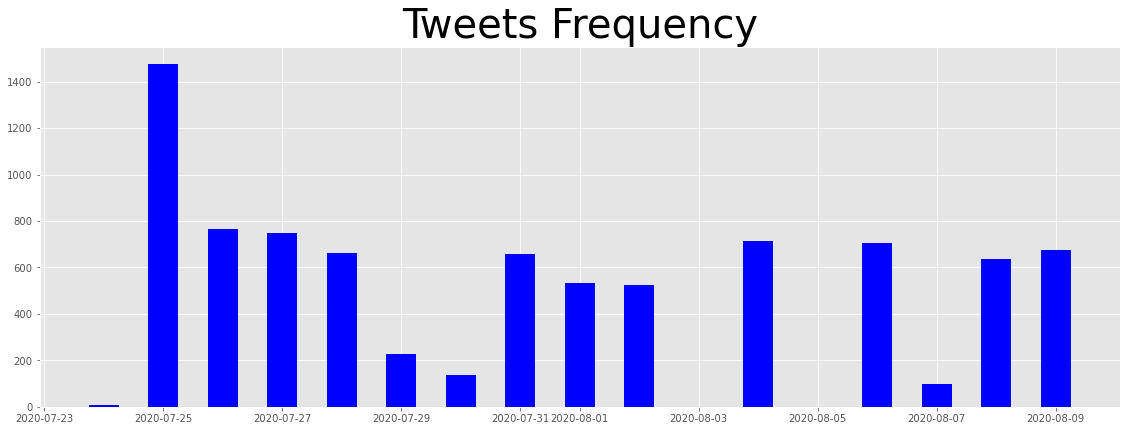

         Date  Count
0  2020-07-24      9
1  2020-07-25   1476
2  2020-07-26    766
3  2020-07-27    749
4  2020-07-28    664
5  2020-07-29    226
6  2020-07-30    137
7  2020-07-31    658
8  2020-08-01    535
9  2020-08-02    525
10 2020-08-04    713
11 2020-08-06    704
12 2020-08-07     99
13 2020-08-08    637
14 2020-08-09    675


In [98]:
def plot_line(x, y, title, max_limit=0):

    f = plt.figure(figsize=(15, 5))
    if max_limit > 0:
        x = x[0:max_limit]
        y = y[0:max_limit]
    ax = f.add_axes([0,0,1,1])
    ax.bar(x,y,color = 'b',width=0.5)
    plt.title(title, fontdict={"fontsize": 40})
    # barlist[np.argmax(y)].set_color(ORANGE_COLOR)
    # for bar in barlist:
    #     yval = bar.get_height()
    #     plt.text(
    #         bar.get_x() + bar.get_width() / 2.0,
    #         1.01 * yval,
    #         int(yval),
    #         ha="center",
    #         va="bottom",
    #     
    plt.show()
    
def datewisetweet(df, plot=False):
    grouped = df.groupby("date_", as_index=False)["time"]
    df_ = grouped.count()
    df_.columns = ["Date", "Count"]
    if plot:
        plot_line(x=df_["Date"], y=df_["Count"], title="Tweets Frequency")

    return df_

datetweets=datewisetweet(new_tweet,plot=True)
print(datetweets)

In [100]:
raw3 = []
for word in new_tweet.text:
    token = nltk.word_tokenize(str(word).lower())
    raw3.extend(token)

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
raw4 = remove_stopwords(raw3)

In [101]:
fdist3 = nltk.FreqDist(raw4)
fdist3

FreqDist({'cases': 1635, 'new': 927, 'amp': 615, 'positive': 472, 'deaths': 434, 'total': 430, 'covid': 422, 'pandemic': 419, 'india': 366, 'today': 356, ...})

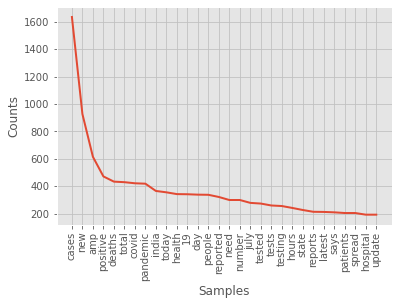

TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

In [102]:
fdist3.plot(30).draw()

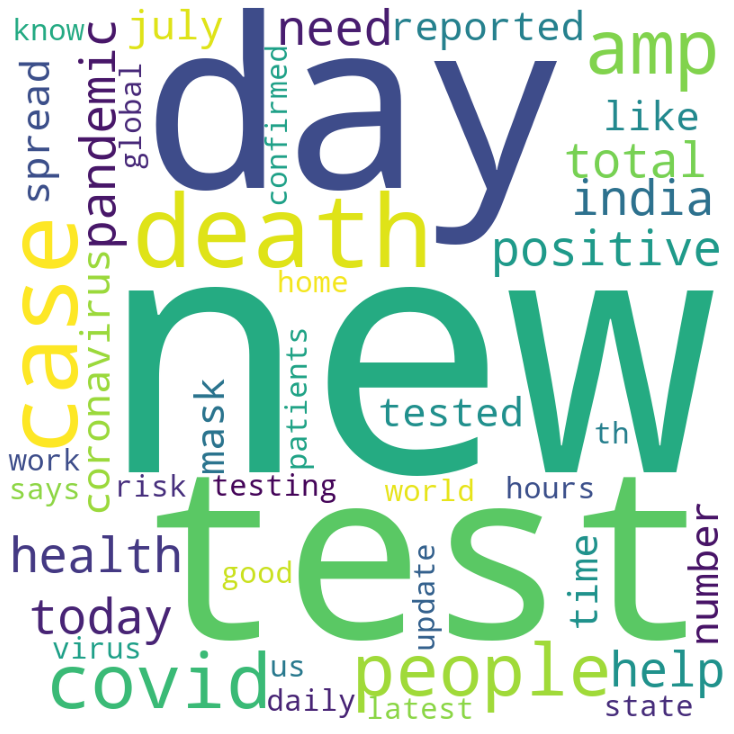

In [103]:
words_for_wordcloud1 = ' '.join([w[0] for w in fdist3.most_common(50)])
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords='',min_font_size = 10).generate(words_for_wordcloud) 
# plot the WordCloud image                        
plt.figure(figsize = (10, 15), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

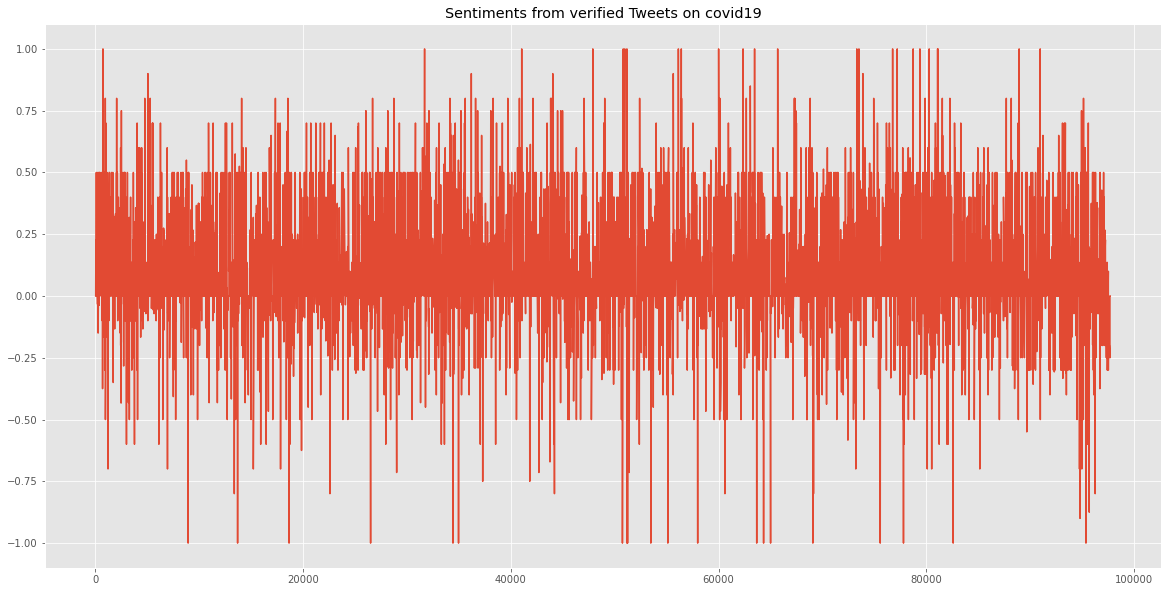

In [144]:
fig, ax = plt.subplots(figsize=(20, 10))


plt.plot(new_tweet['Sentiment'])


plt.title("Sentiments from verified Tweets on covid19")
plt.show()

Mean Sentiments

In [145]:
#Mean of all the sentiments 
mean=tweet['Sentiment'].mean()
mean

0.06632089584752283

In [146]:
#Mean of verified twitter accounts sentiments
mean1=new_tweet['Sentiment'].mean()
mean1

0.0720178516803022

Training and Testing of the distress in tweets

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(tweet['text'])
bow

<54276x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 216162 stored elements in Compressed Sparse Row format>

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(tweet['text'])
tfidf

<54276x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 216162 stored elements in Compressed Sparse Row format>

Logistic Regression Model

In [296]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:54276,:]
test_bow = bow[1000:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, tweet['distress'], random_state=50, test_size=0.4)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.6 # if prediction is greater than or equal to 0.6 then 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.9250756725504201

In [298]:
test_bow

<53276x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 212081 stored elements in Compressed Sparse Row format>

In [301]:
train_tfidf = tfidf[:54276,:]
test_tfidf = tfidf[54276:,:]

xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf, tweet['distress'], random_state=50, test_size=0.4)

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.6

prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.9238557983079067